# Lecture 4: Regularization and `glmnet`

Let's load our libraries:

In [1]:
library(ISLR)
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-2



`glmnet` takes a matrix of predictors, so let’s construct one and leave out the `Salary` variable that we’re trying to predict:

In [2]:
Hitters<-Hitters[complete.cases(Hitters), ]
X<-model.matrix(Salary~., data=Hitters)[, -1]
median_salary<-median(Hitters$Salary)
y_median<-as.numeric(Hitters$Salary >= median_salary)

`glmnet` uses a regularization penalty of the “elasticnet” form

$$ \frac{1-\alpha}{2} ||\beta||_2 + \alpha ||\beta||_1 $$

so $ \alpha=1 $ corresponds to the lasso penalty and $ \alpha=0\ $ corresponds to ridge penalty. Let’s fit a lasso classification model for whether the salary is greater than the median:

In [3]:
c.model.lasso<-glmnet(X, y_median, family="binomial", alpha=1)

This will show us the coefficients as a function of the norm (which is inverse to $ \lambda $). Notice the number of non-zero coefficients along the top axis:

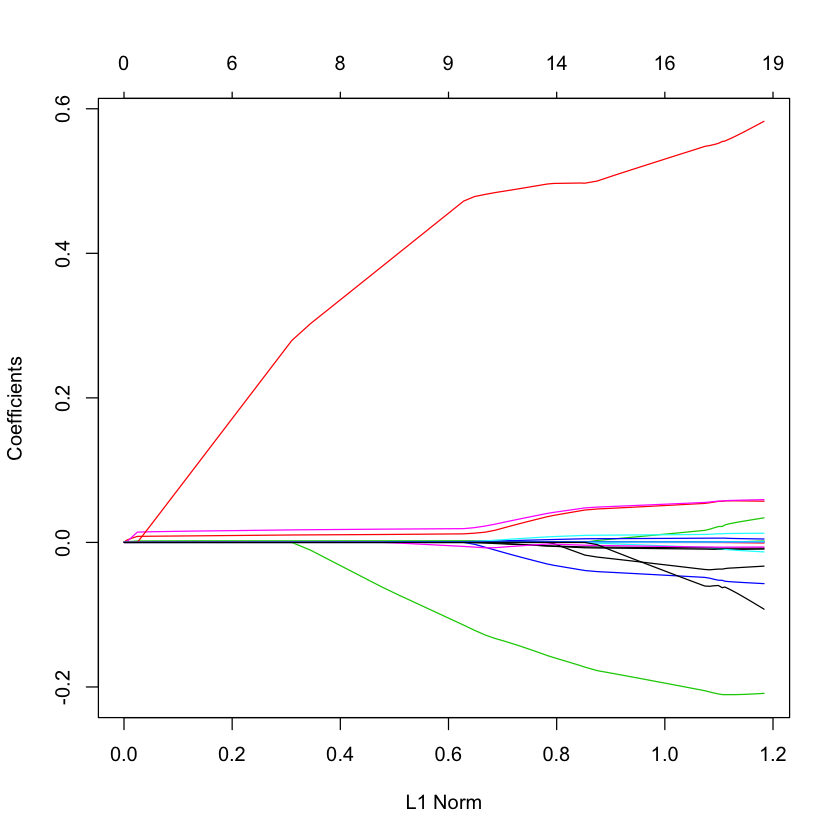

In [4]:
plot(c.model.lasso)

Similarly, let’s fit a lasso regression model for the salary itself:

In [5]:
r.model.lasso<-glmnet(X, Hitters$Salary, family="gaussian", alpha=1)

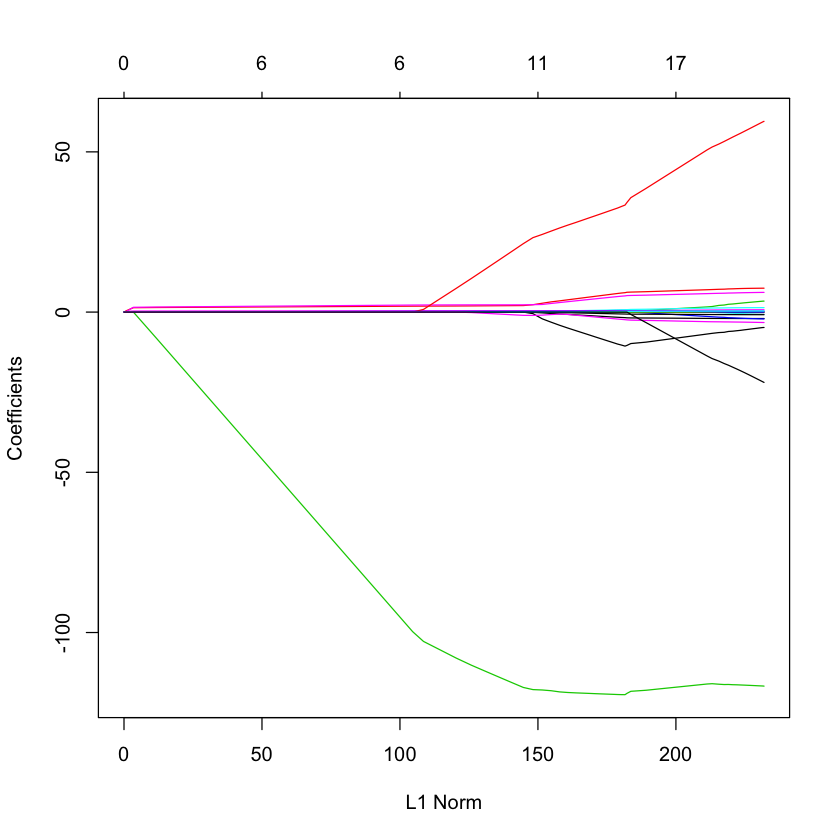

In [6]:
plot(r.model.lasso)

We can use the `cv.glmnet` function to do cross-validation and select the best value of $ \lambda $ for us:

In [7]:
c.cv.model.lasso<-cv.glmnet(X, y_median, family="binomial", alpha=1, nfolds=10) # can also try type.measure="class"
r.cv.model.lasso<-cv.glmnet(X, Hitters$Salary, family="gaussian", alpha=1, nfolds=10)

We can see the out-of-sample error as a function of $ \lambda $ (notice the number of non-zero coefficients along the top axis):

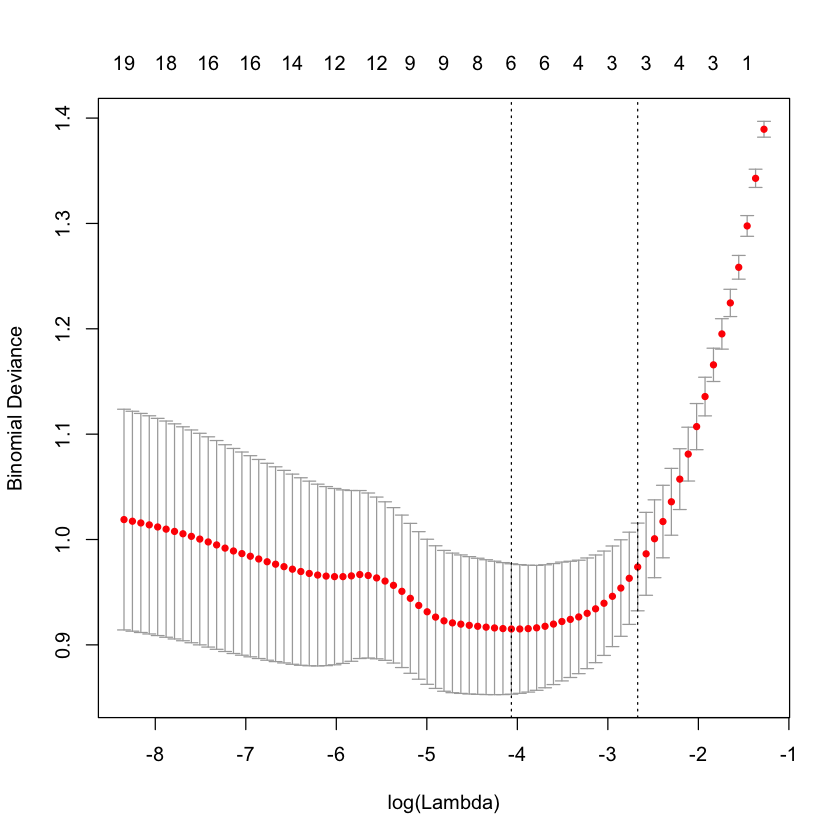

In [8]:
plot(c.cv.model.lasso)

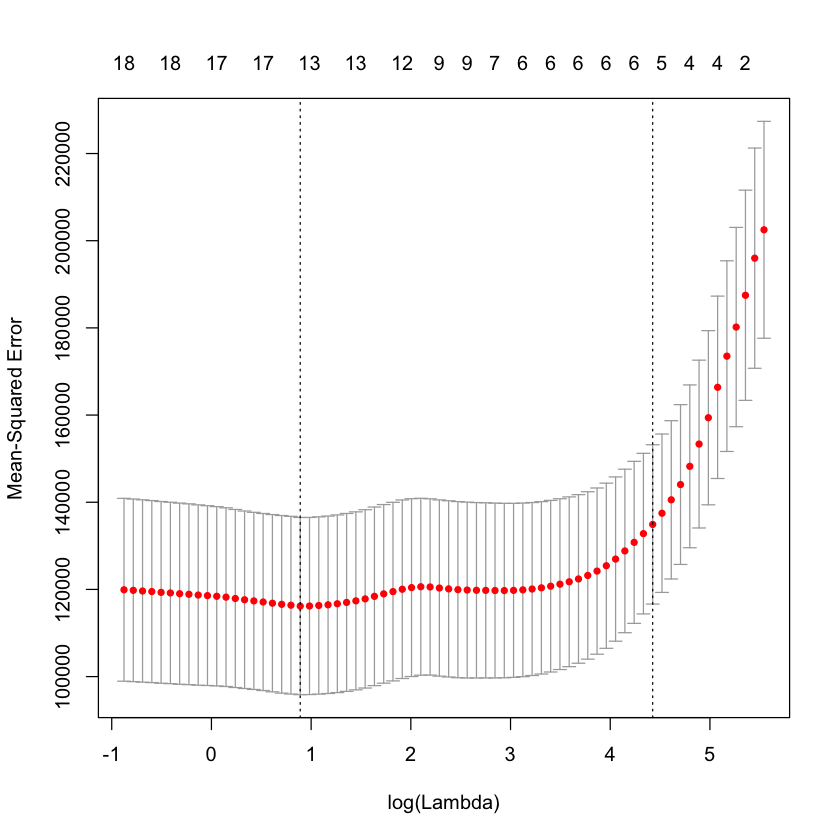

In [9]:
plot(r.cv.model.lasso)

Finally, let’s see how to get the coefficients out. Let’s take the classification models as an example:

In [16]:
attributes(c.cv.model.lasso)

$names
 [1] "lambda"     "cvm"        "cvsd"       "cvup"       "cvlo"      
 [6] "nzero"      "name"       "glmnet.fit" "lambda.min" "lambda.1se"

$class
[1] "cv.glmnet"

In [18]:
c.cv.model.lasso$lambda.min

[1] 0.0171455

In [12]:
c.model.lasso$beta

   [[ suppressing 91 column names ‘s0’, ‘s1’, ‘s2’ ... ]]
   [[ suppressing 91 column names ‘s0’, ‘s1’, ‘s2’ ... ]]


19 x 91 sparse Matrix of class "dgCMatrix"
                                                                            
AtBat      . .           .            .            .            .           
Hits       . .           .            .            .            0.0000270556
HmRun      . .           .            .            .            .           
Runs       . .           .            .            .            .           
RBI        . .           .            .            .            .           
Walks      . .           .            .            .            .           
Years      . .           .            .            .            .           
CAtBat     . .           .            .            .            .           
CHits      . 0.000154266 0.0002986379 4.356309e-04 5.258646e-04 0.0005938741
CHmRun     . .           .            .            .            .           
CRuns      . .           .            1.229407e-06 8.597655e-05 0.0002036960
CRBI       . .           .       

On the right, $ \lambda $ is smallest, so more variables are included with larger coefficients. On the left, labmda is smaller, so fewer variables are included with smaller coefficients.

Let’s take the 25th value of $ \lambda $ as an example:

In [13]:
c.model.lasso$beta[, 25]

AtBat         Hits        HmRun         Runs          RBI        Walks 
0.0000000000 0.0088177570 0.0000000000 0.0000000000 0.0000000000 0.0152325485 
       Years       CAtBat        CHits       CHmRun        CRuns         CRBI 
0.0000000000 0.0000000000 0.0021434921 0.0000000000 0.0000000000 0.0000000000 
      CWalks      LeagueN    DivisionW      PutOuts      Assists       Errors 
0.0000000000 0.0628286612 0.0000000000 0.0002367207 0.0000000000 0.0000000000 
  NewLeagueN 
0.0000000000

And finally, let’s run a classification model with the ridge penalty. Notice that all features are always included, but their size shrinks:

In [19]:
c.model.ridge<-glmnet(X, y_median, family="binomial", alpha=0)

This will show us the coefficients as a function of the norm (which is inverse to $ \lambda $):

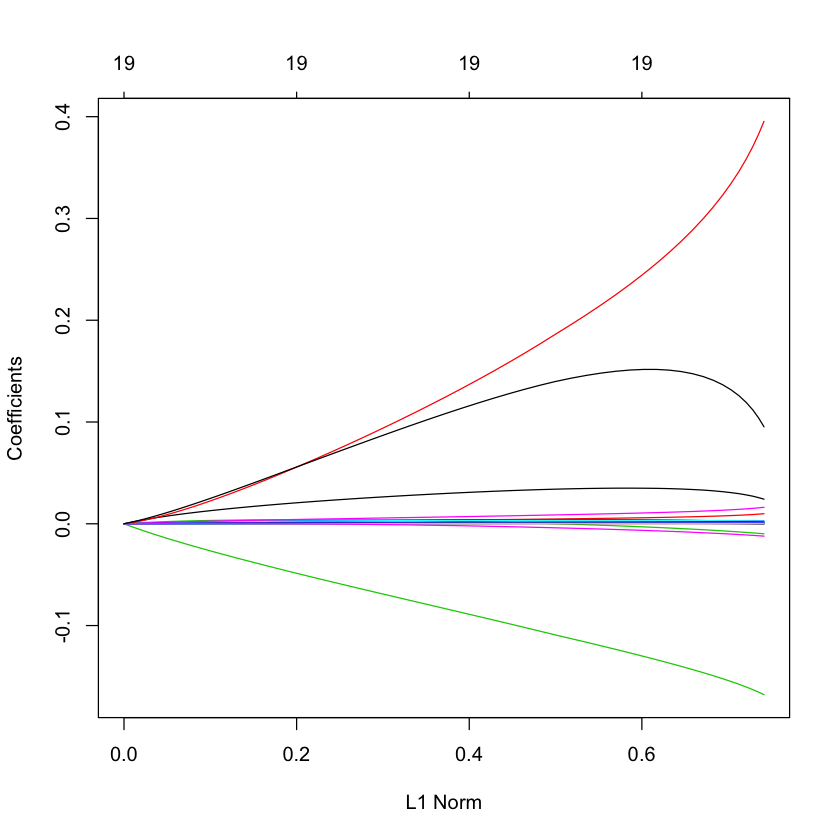

In [20]:
plot(c.model.ridge)

In [21]:
c.cv.model.ridge<-cv.glmnet(X, y_median, family="binomial", alpha=0, nfolds=10)

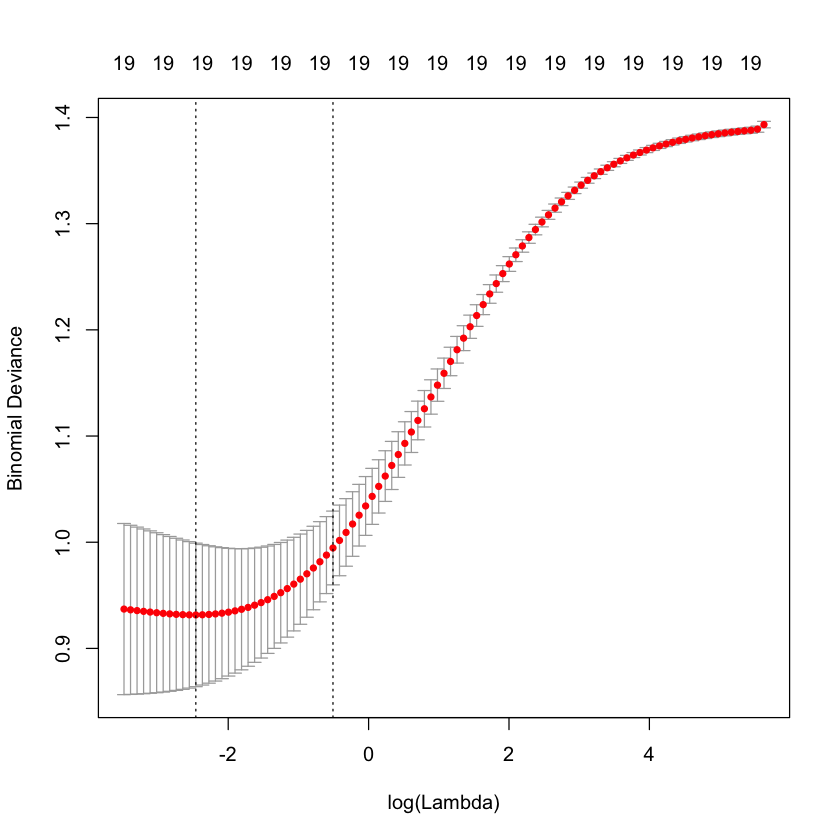

In [22]:
plot(c.cv.model.ridge)